In [1]:
import numpy as np
from sympy import symbols, diff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
def f(x,y):
    #return x**2 + y**2
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

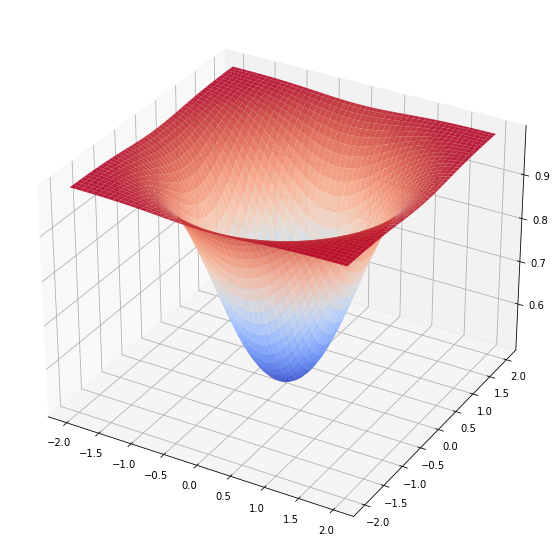

In [3]:
xlist = np.linspace(-2,2,200)
ylist = np.linspace(-2,2,200)
x2, y2 = np.meshgrid(xlist, ylist)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x2, y2, f(x2,y2), cmap=cm.coolwarm, alpha=.9)

In [4]:
a, b = symbols("x, y")
fx = diff(f(a,b), a)
fy = diff(f(a,b), b)

guess = np.array((2,1))
h = .1
eps = 1e-12
max_iter = 200
values_array = guess.reshape(1,2)
for i in range(max_iter):
    point = guess
    f2x = fx.evalf(subs={a:guess[0], b:guess[1]})
    f2y = fy.evalf(subs={a:guess[0], b:guess[1]})
    gradient = np.array((f2x, f2y))
    guess = point - h*gradient
    values_array = np.append(values_array, guess.reshape(1,2), axis=0)
    if abs(gradient.all()) < eps:
        break
print("optimised point : ", guess)
print("value of derivative at optimised point : ", gradient)
print("value of function at optimised point : ", f(*guess))
print(i, "times")
#values_array

optimised point :  [0.0273432274818877 0.0136716137409438]
value of derivative at optimised point :  [0.0158927988153002 0.00794639940765012]
value of function at optimised point :  0.500256681156440
199 times


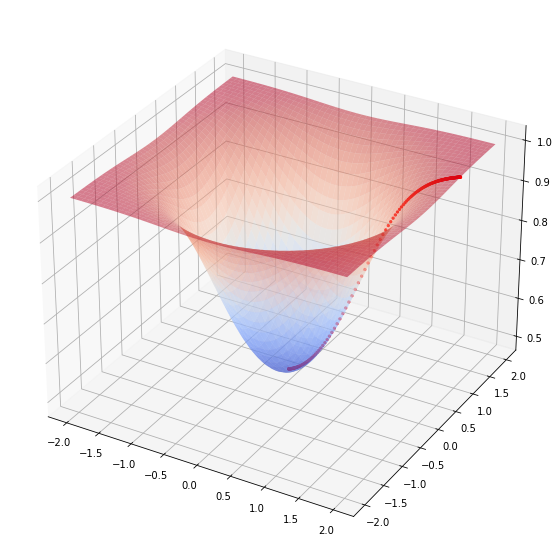

In [5]:
xlist = np.linspace(-2,2,200)
ylist = np.linspace(-2,2,200)
x2, y2 = np.meshgrid(xlist, ylist)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x2, y2, f(x2,y2), cmap=cm.coolwarm, alpha=.5)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), 
           s=5, alpha=1, color='red')